In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the Dataset
df = pd.read_csv("../data/raw/data.csv") 

In [ ]:
# data overview
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# Exploratory Data Analysis (EDA)

print("Missing values per column:")
print(df.isnull().sum())

print("\nSummary statistics:")
display(df.describe())

Missing values per column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Summary statistics:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


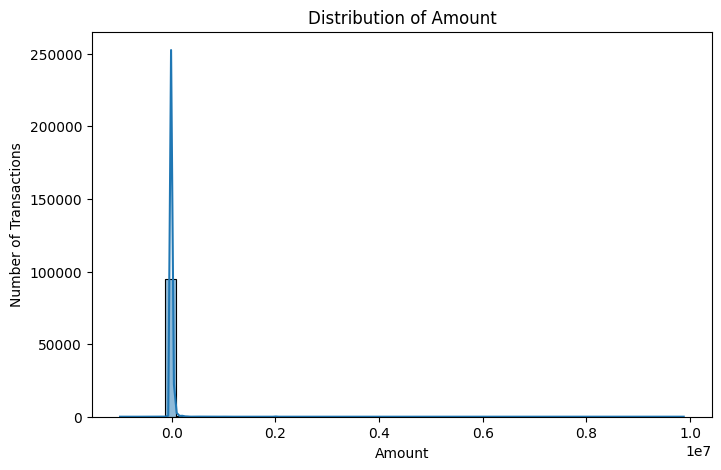

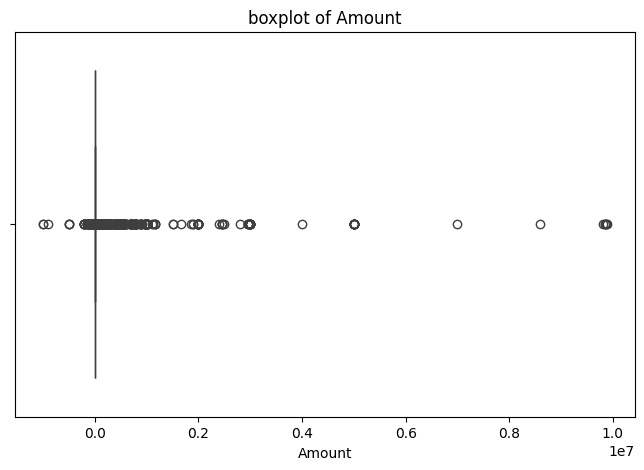

In [27]:
# Distribution of target variable 'Amount'
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Amount")
plt.ylabel("Number of Transactions")
plt.show()

# Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'])
plt.title("boxplot of Amount")
plt.show()

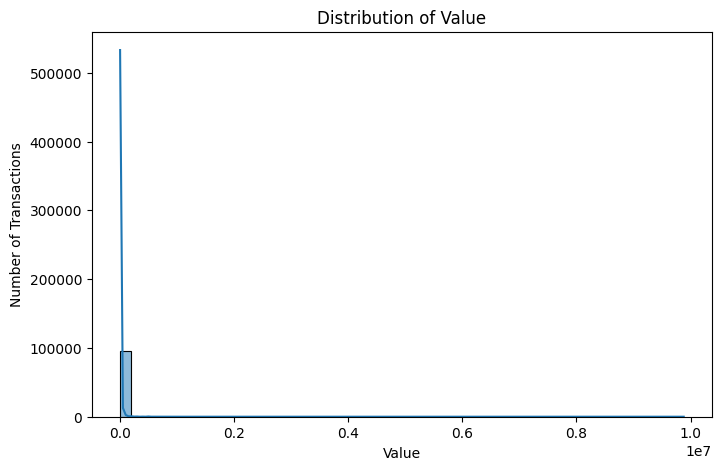

In [26]:
# Distribution of target variable 'value'
plt.figure(figsize=(8,5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title("Distribution of Value")
plt.ylabel("Number of Transactions")
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_28792\3264459544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="viridis")


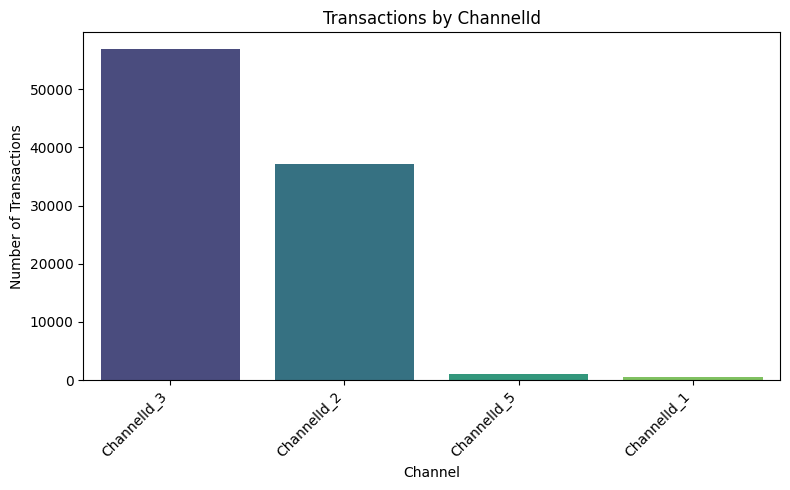

In [28]:
channel_counts = df['ChannelId'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="viridis")

plt.title("Transactions by ChannelId")
plt.xlabel("Channel")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_28792\2140715401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_providers.index, y=top_providers.values, palette="magma")


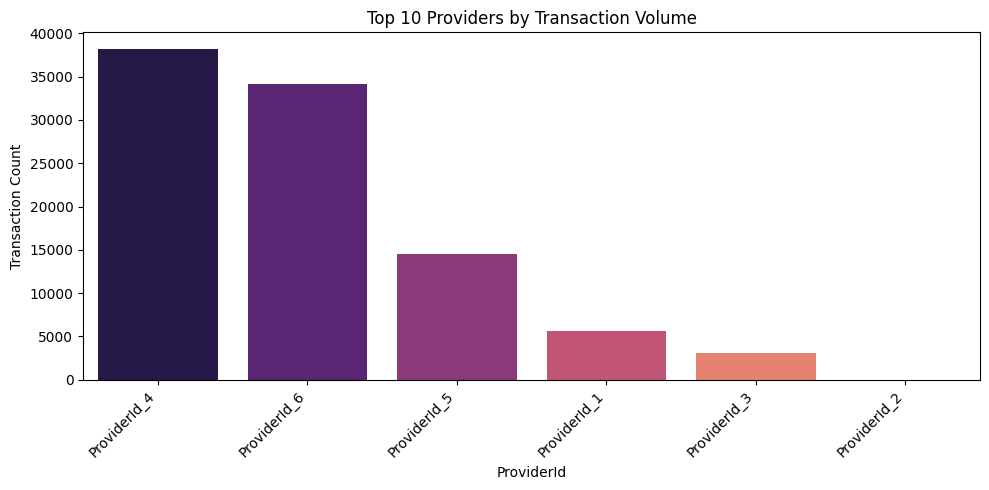

In [29]:
# Get top 10 providers
top_providers = df['ProviderId'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_providers.index, y=top_providers.values, palette="magma")

plt.title("Top 10 Providers by Transaction Volume")
plt.xlabel("ProviderId")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


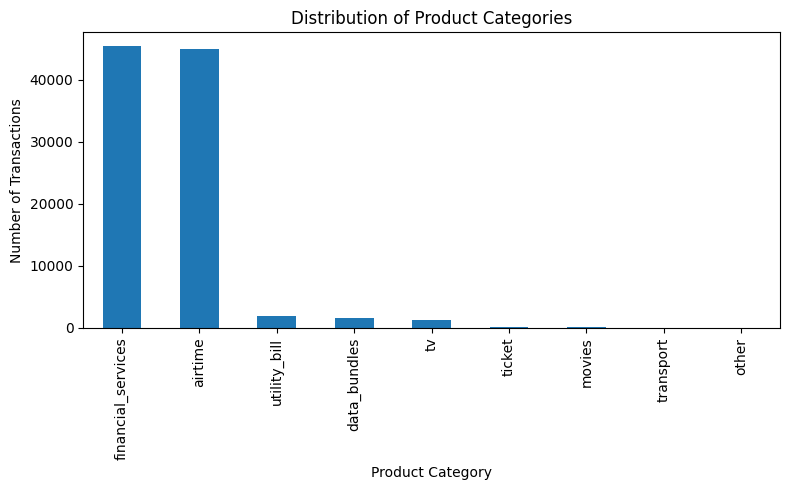

In [19]:
# categorical distributions

plt.figure(figsize=(8,5))
df['ProductCategory'].value_counts().plot(kind='bar')

plt.title("Distribution of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")

plt.tight_layout()
plt.show()


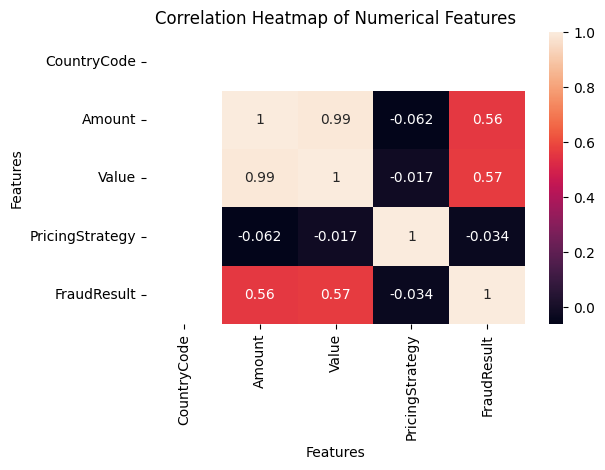

In [21]:
# correlation and missing values
df.isna().sum()
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

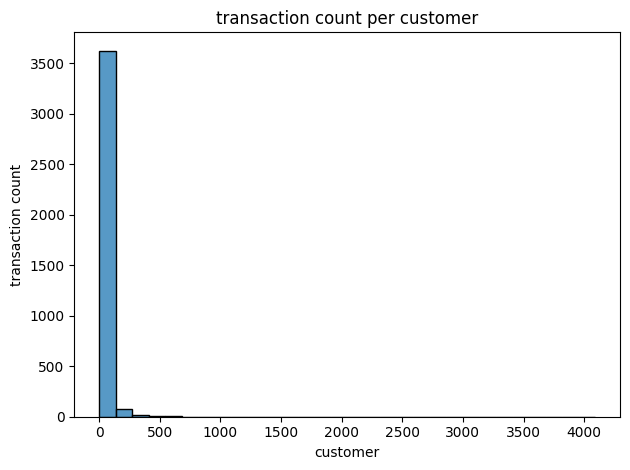

In [23]:
# transaction count per customer
txn_count = df.groupby('CustomerId').size()
sns.histplot(txn_count, bins=30)
plt.title("transaction count per customer")
plt.ylabel("transaction count")
plt.xlabel("customer")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'FraudResult plot')

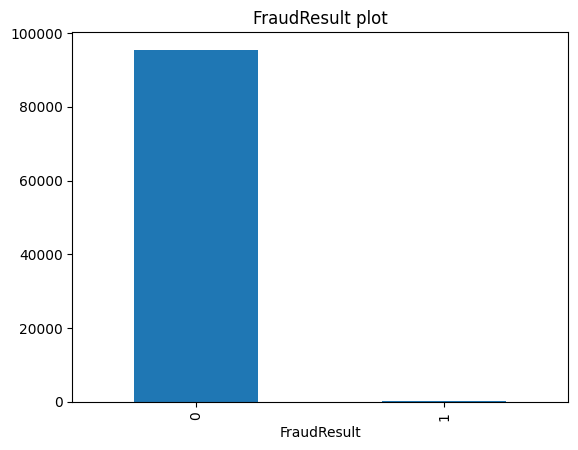

In [25]:
df['FraudResult'].value_counts().plot(kind='bar')
plt.title("FraudResult plot")


### Key EDA Insights
1. Transaction amounts are heavily right-skewed.Most transactions have very small amounts.A small number of transactions have extremely large values.
2. Majority of users transact infrequently.Very few customers are frequent users.
3. Fraudulent transactions are rare or nearly zero.
4. A small number of product categories dominate volume.
5. Significant variance across customers.Some spend very little, others spend a lot.